Tamanho do arquivo: 153034 bytes


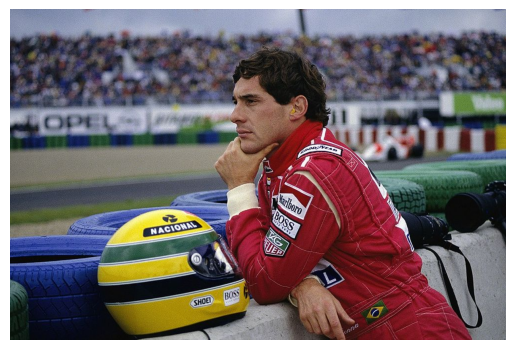

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open("senna.jpg", "rb") as f:
    img_bytes = bytearray(f.read())
print(f"Tamanho do arquivo: {len(img_bytes)} bytes")

img=mpimg.imread('senna.jpg')

plt.imshow(img)
plt.axis("off")
plt.show()



In [8]:
!apt-get install imagemagick


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

In [9]:
!convert senna.jpg senna.ppm

Convertendo imagem colorida .ppm para o preto e branco:

In [10]:
def converter_para_pb(input_path, output_path):
    with open(input_path, "rb") as f:
        dados = f.read()

    # Procurar o início dos dados da imagem (depois do cabeçalho)
    header_end = dados.find(b"\n255\n") + len(b"\n255\n")
    header = dados[:header_end].decode()

    # Processar os pixels
    pixel_bytes = bytearray(dados[header_end:])
    for i in range(0, len(pixel_bytes), 3):
        r, g, b = pixel_bytes[i], pixel_bytes[i+1], pixel_bytes[i+2]
        cinza = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
        pixel_bytes[i] = pixel_bytes[i+1] = pixel_bytes[i+2] = cinza

    # Salvar a nova imagem
    with open(output_path, "wb") as f:
        f.write(header.encode() + pixel_bytes)

# Uso (se a imagem estiver em PPM)
converter_para_pb("senna.ppm", "senna_pb.ppm")


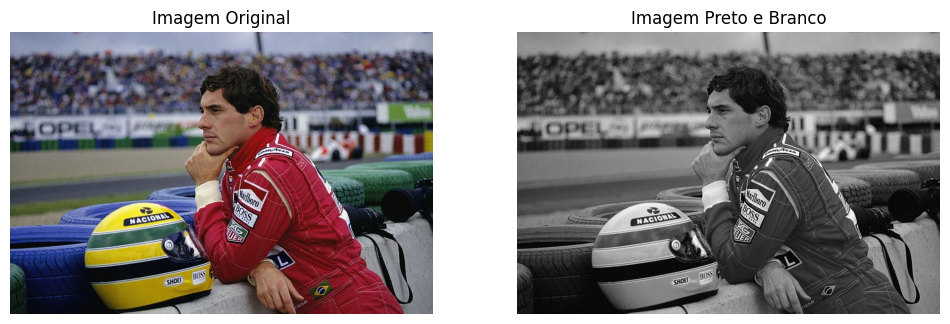

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

# Abrir as imagens
imagem_senna = Image.open('senna.ppm')
imagem_senna_pb = Image.open('senna_pb.ppm')

# Exibir as imagens lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha e 2 colunas

# Mostrar as imagens
axes[0].imshow(imagem_senna)
axes[0].set_title('Imagem Original')
axes[0].axis('off')  # Desativar os eixos

axes[1].imshow(imagem_senna_pb)
axes[1].set_title('Imagem Preto e Branco')
axes[1].axis('off')  # Desativar os eixos

# Exibir o gráfico
plt.show()


Convertendo agora a foto preto e branca para binária

In [40]:
imagem_senna_pb = Image.open('senna_pb.ppm')

limiar = 108

# Converter para binário
imagem_binaria = imagem_senna_pb.point(lambda p: 255 if p > limiar else 0)

# Salvar a nova imagem
with open('senna_bn.ppm', "wb") as f:
    imagem_binaria.save(f, format='PPM')


Plotando as 3 imagens

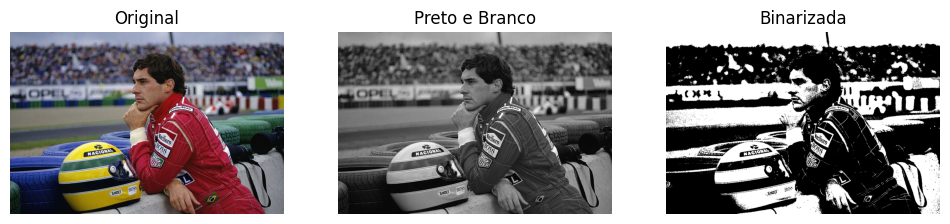

In [43]:
import matplotlib.pyplot as plt
from PIL import Image

# Abrir as imagens
imagem_senna = Image.open('senna.ppm')
imagem_senna_pb = Image.open('senna_pb.ppm')
imagem_senna_bn = Image.open('senna_bn.ppm')


# Exibir as imagens lado a lado
fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 linha e 3 colunas

# Mostrar as imagens
axes[0].imshow(imagem_senna)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(imagem_senna_pb)
axes[1].set_title('Preto e Branco')
axes[1].axis('off')

axes[2].imshow(imagem_senna_bn)
axes[2].set_title('Binarizada')
axes[2].axis('off')

# Exibir o gráfico
plt.show()

Testando agora com a biblioteca openCV

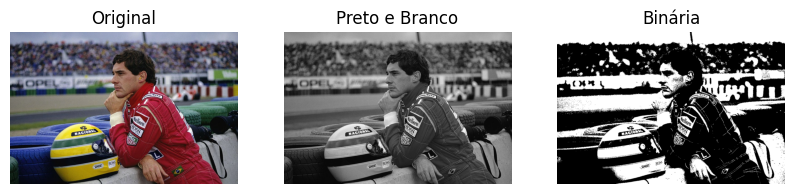

In [42]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('senna.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 108, 255, cv2.THRESH_BINARY)

# Exibir as imagens lado a lado usando Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Converter de BGR para RGB para o Matplotlib
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Preto e Branco')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary, cmap='gray')
plt.title('Binária')
plt.axis('off')

plt.show()
